# Indigo v2.1 Algorithmic Interest Visuals

**Indigo Protocol is a synthetics based protocol on Cardano. Users can mint synthetic assets like iBTC/iETH/iUSD by providing ADA as collateral.
In Indigo v2, the interest rate concept was introduced and v2.1 onwards an algorithmic interest was introduced, which varies according to the state of the protocol iAssets. 
The visualisations of how the interest rate would vary is shown in this notebook using charts and graph. Thi visual data was presented to the community as a part of the DAO proposal for Indigo v2.1.**

In [6]:
import matplotlib.pyplot as plt
import numpy as np

**The algo interest formula consists of two parts ie a base interest and an additional interset which increases linearly as we move away from the RMR.
The ideal state of the protocol is to have sufficient debt in the redeemable zones and liquidation zones, so that the protocol balance is maintained.
The idea behind the algo interest concept is that as more positions move away from the Liquidation and Redemption zone; higher interest will be charged as the this will encourage users to mint more iAssets, and get the interest rate back to the base rate.**

*The graph below shows the trend of the interest rate with the changes in the ITCR parameter of the iAsset.*

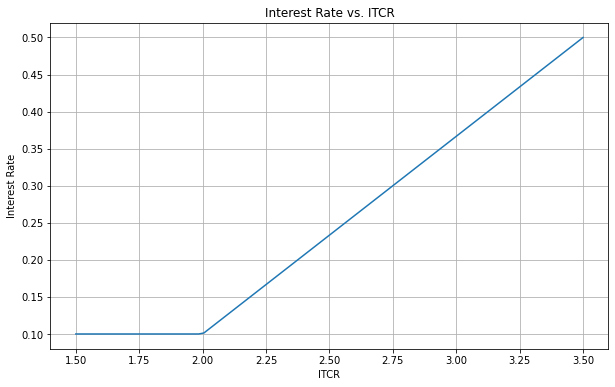

In [7]:
# Given values
base_int = 0.1     # 10%
ntcr = 2         # 200%
ctcr = 3.5         # 350%
upper_limit_int = 0.5  # 50%
lr = 1.5           # 150%

# Define the equation
def interest_rate(itcr):
    if itcr < lr:
        return base_int
    elif itcr >= lr and itcr <= ntcr:
        return base_int
    else:
        return base_int + ((itcr - ntcr) / (ctcr - ntcr)) * (upper_limit_int - base_int)

# Create an array of ITCR values to plot
itcr_values = np.linspace(lr, ctcr, 100)

# Calculate the corresponding interest rates
interest_rates = [interest_rate(itcr) for itcr in itcr_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(itcr_values, interest_rates)
plt.xlabel('ITCR')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. ITCR')
plt.grid(True)
plt.show()

**The below graph shows that, the interest rate charged increases for same levels of ITCR as we reduce NTCR keeping all other parameters same.**

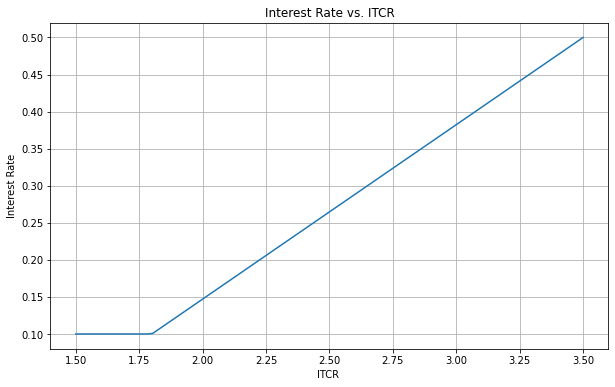

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
base_int = 0.1     # 10%
ntcr = 1.8         # 200%
ctcr = 3.5         # 350%
upper_limit_int = 0.5  # 50%
lr = 1.5           # 150%

# Define the equation
def interest_rate(itcr):
    if itcr < lr:
        return base_int
    elif itcr >= lr and itcr <= ntcr:
        return base_int
    else:
        return base_int + ((itcr - ntcr) / (ctcr - ntcr)) * (upper_limit_int - base_int)

# Create an array of ITCR values to plot
itcr_values = np.linspace(lr, ctcr, 100)

# Calculate the corresponding interest rates
interest_rates = [interest_rate(itcr) for itcr in itcr_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(itcr_values, interest_rates)
plt.xlabel('ITCR ')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. ITCR')
plt.grid(True)
plt.show()

**The below graph shows that, the interest rate charged reduces for same levels of ITCR as we increase CTCR keeping all other parameters same.**

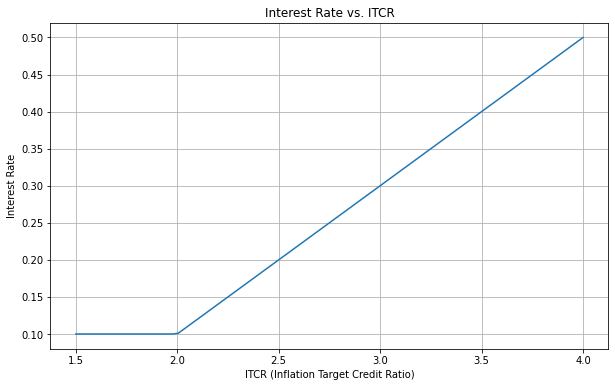

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
base_int = 0.1     # 10%
ntcr = 2         # 200%
ctcr = 4        # 350%
upper_limit_int = 0.5  # 50%
lr = 1.5           # 150%

# Define the equation
def interest_rate(itcr):
    if itcr < lr:
        return base_int
    elif itcr >= lr and itcr <= ntcr:
        return base_int
    else:
        return base_int + ((itcr - ntcr) / (ctcr - ntcr)) * (upper_limit_int - base_int)

# Create an array of ITCR values to plot
itcr_values = np.linspace(lr, ctcr, 100)

# Calculate the corresponding interest rates
interest_rates = [interest_rate(itcr) for itcr in itcr_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(itcr_values, interest_rates)
plt.xlabel('ITCR (Inflation Target Credit Ratio)')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. ITCR')
plt.grid(True)
plt.show()

**The below graph shows the interest rate trend on adding an exponent factor to the interest rate formula.The interest rate increases slowly at first, but picks up rapidly as we move towards CTCR.**

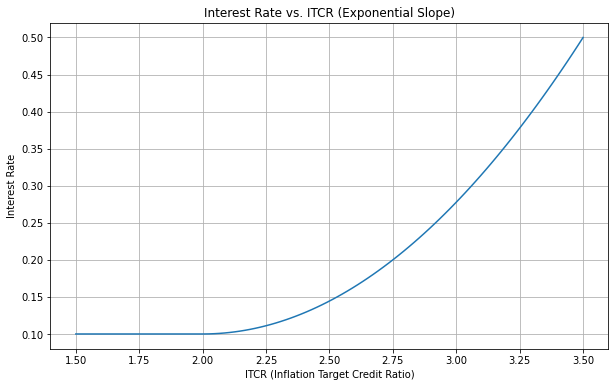

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
base_int = 0.1     
ntcr = 2.0         
ctcr = 3.5         
upper_limit_int = 0.5  
lr = 1.5           
exponent = 2      # Exponent value for the exponential slope

# Define the equation
def interest_rate(itcr):
    if itcr < lr:
        return base_int
    elif itcr >= lr and itcr <= ntcr:
        return base_int
    else:
        ratio = (itcr - ntcr) / (ctcr - ntcr)
        return base_int + (ratio ** exponent) * (upper_limit_int - base_int)

# Create an array of ITCR values to plot
itcr_values = np.linspace(lr, ctcr, 100)

# Calculate the corresponding interest rates
interest_rates = [interest_rate(itcr) for itcr in itcr_values]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(itcr_values, interest_rates)
plt.xlabel('ITCR (Inflation Target Credit Ratio)')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs. ITCR (Exponential Slope)')
plt.grid(True)
plt.show()

**The below graph shows the ideal distribution of CDPs based on the CR for the smooth functioning of the Indigo protocol. As shown in the graph, the distribution should follow a right skewed distribution, with maximun CDPs lying around NTCR i.e 200%. This aim of the algo interest is to achieve this ideal distribution of CDPs which helps in maintaining the peg of iAssets by discouraging over leveraging as well as encouraging spot buying of iAssets, which helps in keeps the iAssets pegged to their true value.**

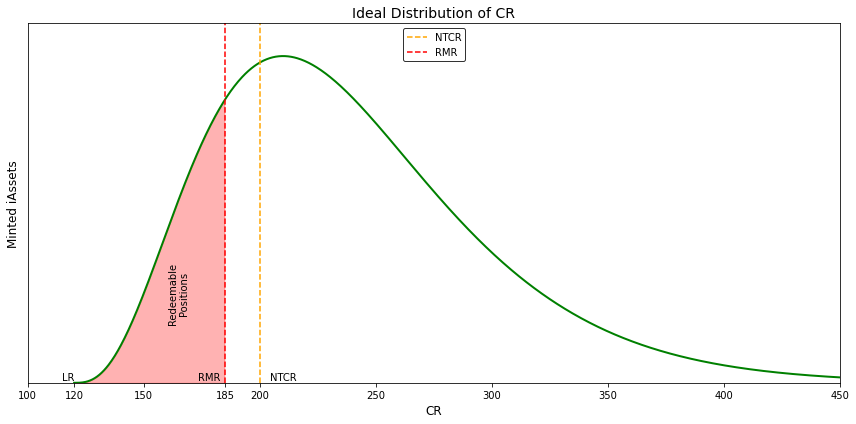

In [11]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(12, 6))

# Generate data for a right-skewed distribution using a gamma distribution
def right_skewed(x, a=4, loc=120, scale=30):
    return (1 / (scale * np.math.gamma(a))) * ((x - loc) / scale)**(a-1) * np.exp(-(x - loc) / scale)

x = np.linspace(120, 450, 1000)
y = right_skewed(x)

# Plot the curve
plt.plot(x, y, 'g-', linewidth=2)

# Set axis labels
plt.xlabel('CR', fontsize=12)
plt.ylabel('Minted iAssets', fontsize=12)
plt.yticks([])
# Set x-axis range
plt.xlim(120, 450)

# Set y-axis range to ensure curve is visible
plt.ylim(0, max(y) * 1.1)

# Add vertical lines and labels
plt.axvline(x=200, color='orange', linestyle='--', label='NTCR')
plt.text(216, plt.ylim()[1]/2000, 'NTCR', rotation=0, va='bottom', ha='right')

plt.axvline(x=185, color='red', linestyle='--', label='RMR')
plt.text(183, plt.ylim()[1]/2000, 'RMR', rotation=0, va='bottom', ha='right')
plt.xticks(list(plt.xticks()[0]) + [185]) 
plt.xticks(list(plt.xticks()[0]) + [120]) 
plt.text(120, plt.ylim()[1]/2000, 'LR', rotation=0, va='bottom', ha='right')

# Shade the area from 120 to 185
plt.fill_between(x, y, where=(x >= 120) & (x <= 185), color='red', alpha=0.3)
plt.text(165, plt.ylim()[1]/4, 'Redeemable\nPositions', rotation=90, va='center', ha='center')

# Add legend
legend = plt.legend(loc='upper center', frameon=True, framealpha=0.8, edgecolor='black')
legend.get_frame().set_facecolor('white')

# Set title
plt.title('Ideal Distribution of CR', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()